# 1. Loading appropriate libraries and data

In [61]:
import numpy as np
import pandas as pd
import copy
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sc
sns.set()

df = pd.read_csv("/Users/jastejsingh/Python/Personal/IE_542/Project_1/SeoulBikeData.csv")

In [62]:
df.head(5)

,Date,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [63]:
df.count()

Date                         8760
Rented Bike Count            8760
Hour                         8760
Temperature(�C)              8760
Humidity(%)                  8760
Wind speed (m/s)             8760
Visibility (10m)             8760
Dew point temperature(�C)    8760
Solar Radiation (MJ/m2)      8760
Rainfall(mm)                 8760
Snowfall (cm)                8760
Seasons                      8760
Holiday                      8760
Functioning Day              8760
dtype: int64

In [64]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(�C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(�C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

This shows no empty data points

In [65]:
df.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(�C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(�C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

Let's rename the columns for ease.

In [66]:
df.columns = ['date', 'rent_count', 'hour', 'temp', 'humid', 'wind_speed','visib', 'dew_temp', 'radiation', 'rainfall', 'snow', 'season','holiday','functioning_day']

In [67]:
df.head(5)

,date,rent_count,hour,temp,humid,wind_speed,visib,dew_temp,radiation,rainfall,snow,season,holiday,functioning_day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


# 2. Exploratory Data Analaysis (EDA)

In [68]:
df.describe()

,rent_count,hour,temp,humid,wind_speed,visib,dew_temp,radiation,rainfall,snow
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


<Axes: xlabel='rent_count', ylabel='Count'>

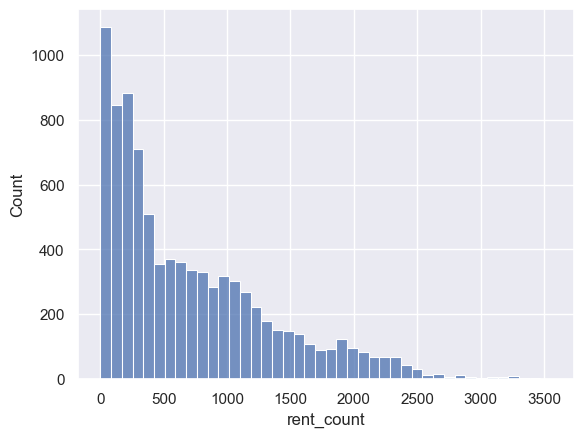

In [69]:
sns.histplot(df['rent_count'])

This shows our predictor variable(number of rented bike count) is not really normal, so we should do log transformation.

log_rent_count = log(1+rent_count)

In [70]:
df['log_rent_count'] = np.log1p(df['rent_count'].astype(int))
print(df['log_rent_count'])

0       5.541264
1       5.323010
2       5.159055
3       4.682131
4       4.369448
          ...   
8755    6.911747
8756    6.639876
8757    6.543912
8758    6.569481
8759    6.371612
Name: log_rent_count, Length: 8760, dtype: float64


<Axes: xlabel='log_rent_count', ylabel='Count'>

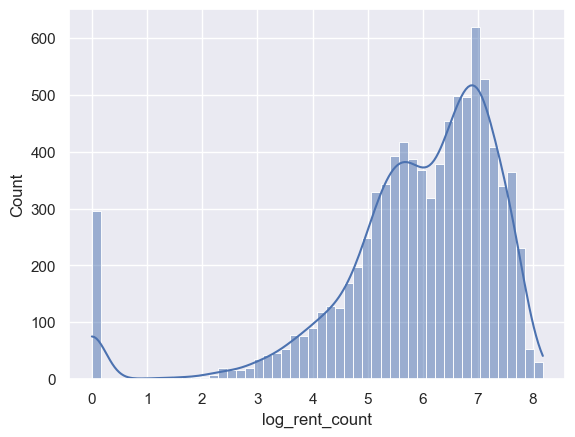

In [71]:
sns.histplot(df['log_rent_count'], kde= True)

In [72]:
sc.stats.shapiro(df['log_rent_count'])  # returns (statistic, p-value)

/Users/jastejsingh/Python/.venv/lib/python3.13/site-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8760.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=np.float64(0.8366857812715264), pvalue=np.float64(2.156748020802237e-69))

As the data is still highly skewed, and removing 0s will not give an accurate behaviour. so we try using transformation

log_rent_count = log(100+rent_count)

In [73]:
df['log_rent_count'] = np.log(100+df['rent_count'])

<Axes: xlabel='log_rent_count', ylabel='Count'>

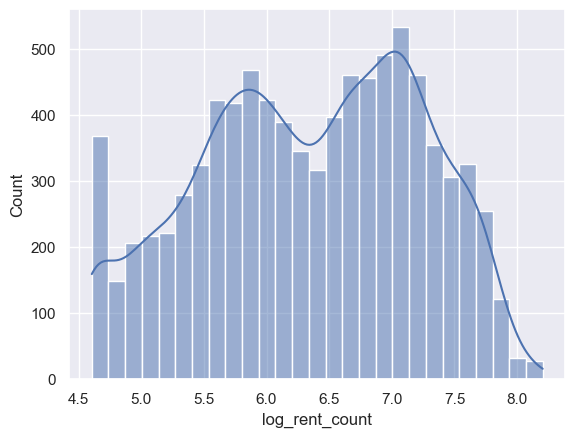

In [74]:
sns.histplot(df['log_rent_count'], kde= True)

In [75]:
df.count()

date               8760
rent_count         8760
hour               8760
temp               8760
humid              8760
wind_speed         8760
visib              8760
dew_temp           8760
radiation          8760
rainfall           8760
snow               8760
season             8760
holiday            8760
functioning_day    8760
log_rent_count     8760
dtype: int64

In [76]:
sc.stats.shapiro(df['log_rent_count'])  # returns (statistic, p-value)

/Users/jastejsingh/Python/.venv/lib/python3.13/site-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8760.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=np.float64(0.9732949944212709), pvalue=np.float64(1.817847266288103e-37))

## Visualization of numerical data points

In [77]:
features = ['hour','temp', 'humid', 'wind_speed', 'visib', 'dew_temp', 'radiation', 'rainfall', 'snow']

In [78]:
def histogram_boxplot(data, feature, figsize=(10, 5), kde=True, bins=50):
    """
    This is a function to plot a boxplot and a histogram along the same scale
    :data: dataframe
    :feature: dataframe column
    :figsize: size of figure
    :kde: whether to the show density curve
    :bins: number of bins for histogram
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

/var/folders/b8/2d7gbg8x4f5_t6g67hccxsj40000gn/T/ipykernel_76609/3090232098.py:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
/var/folders/b8/2d7gbg8x4f5_t6g67hccxsj40000gn/T/ipykernel_76609/3090232098.py:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
/var/folders/b8/2d7gbg8x4f5_t6g67hccxsj40000gn/T/ipykernel_76609/3090232098.py:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
/var/folders/b8/2d7gbg8x4f5_t6g67hccxsj40000gn/T/ipykernel_76609/3090232098.py:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
/var/folders/b8/2d7gbg8x4f5_t6g67hccxsj40000gn/T/ipykernel_76609/3090232098.py:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
/var/folders/b8/2d7gbg8x4f5_t6g67hccxsj40000gn/T/ipykernel_76609/3090232098.py:19: UserWarning: Ignoring `palette` becau

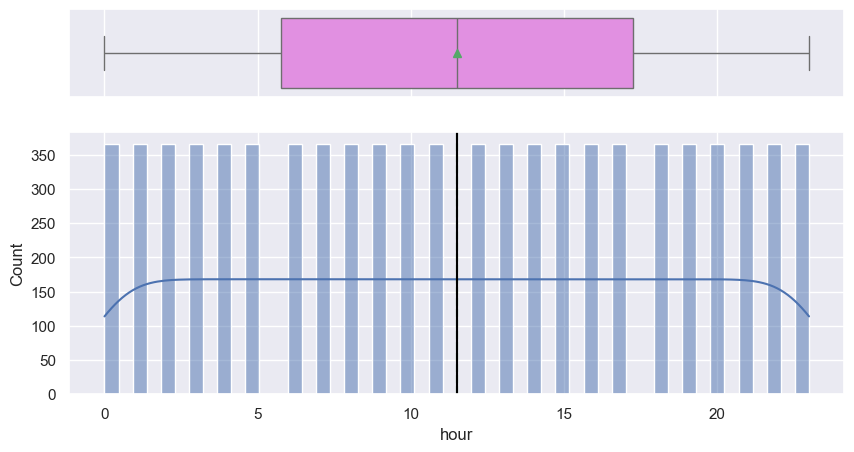

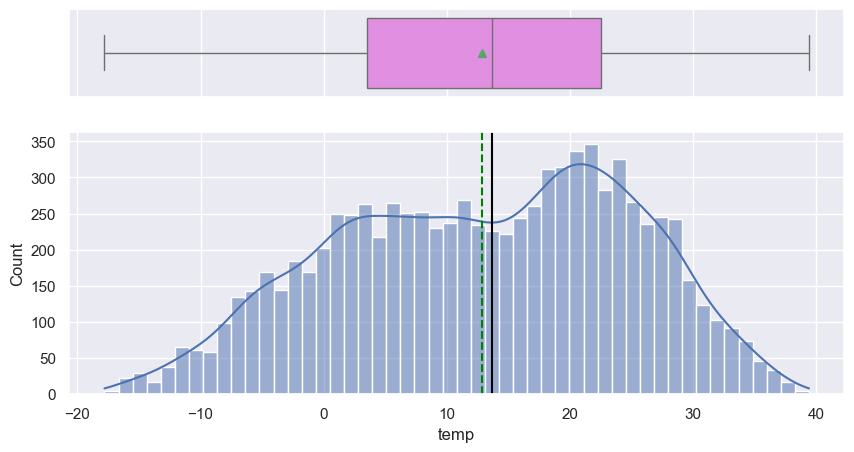

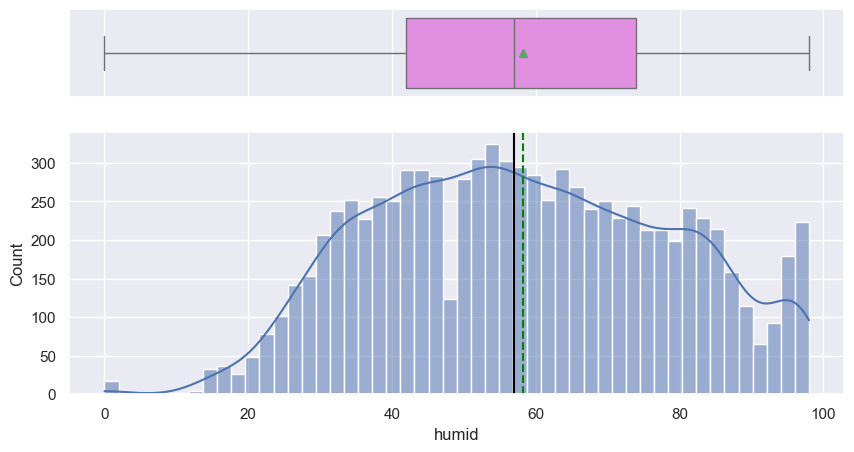

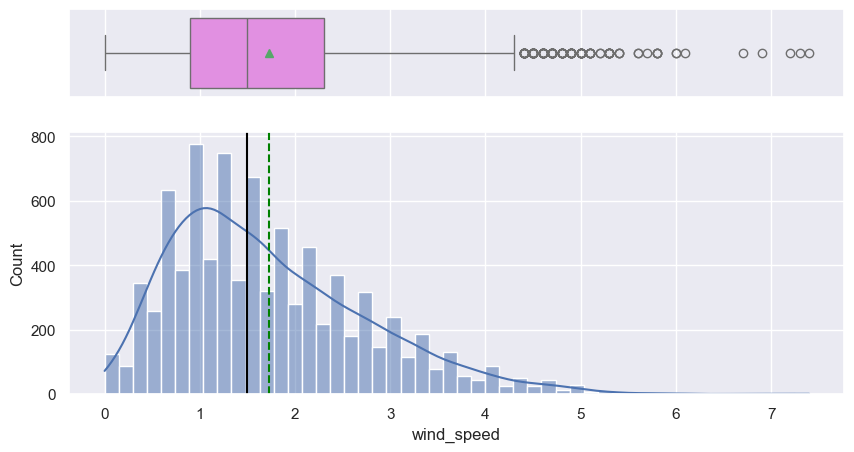

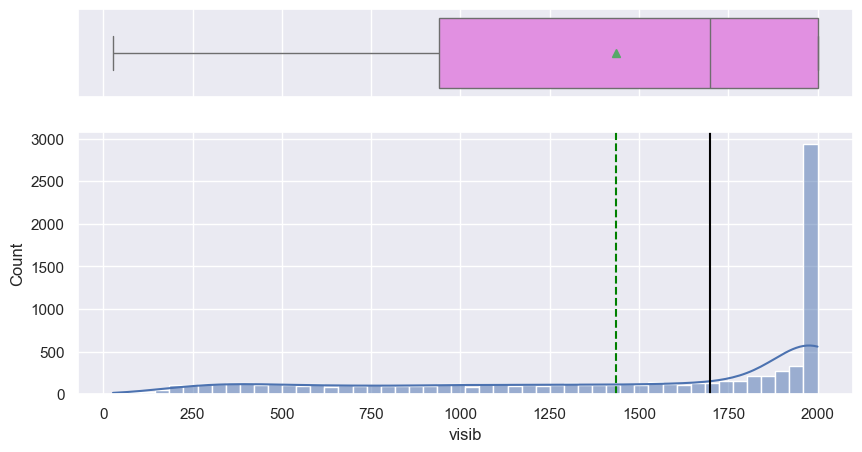

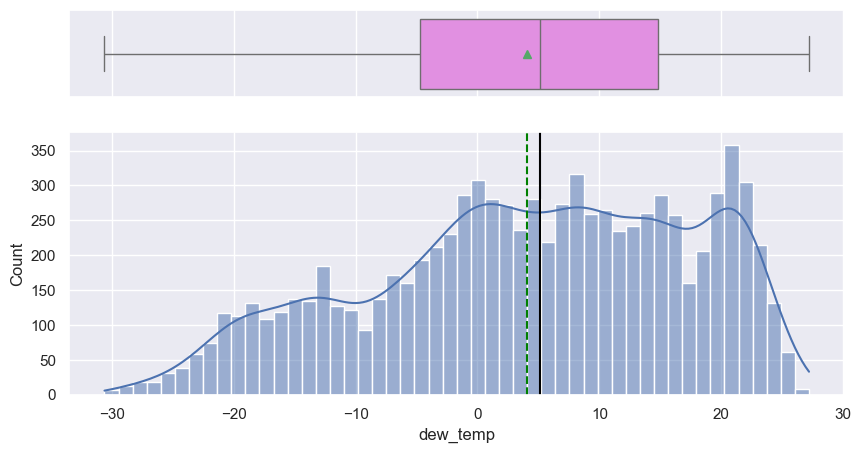

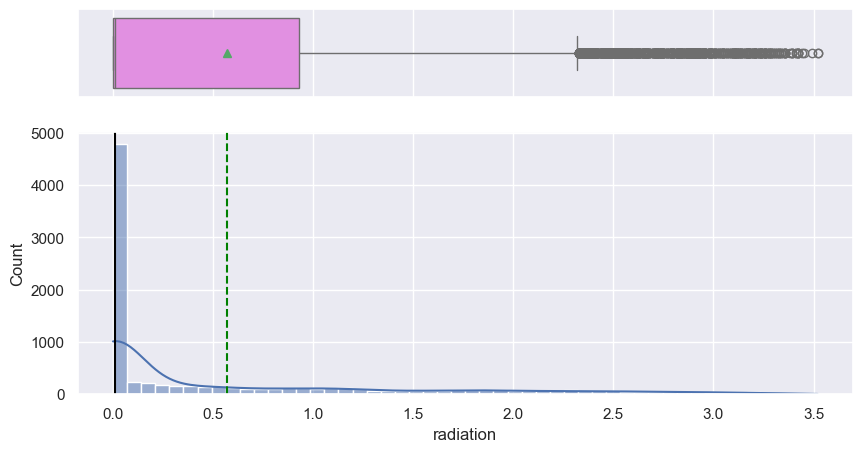

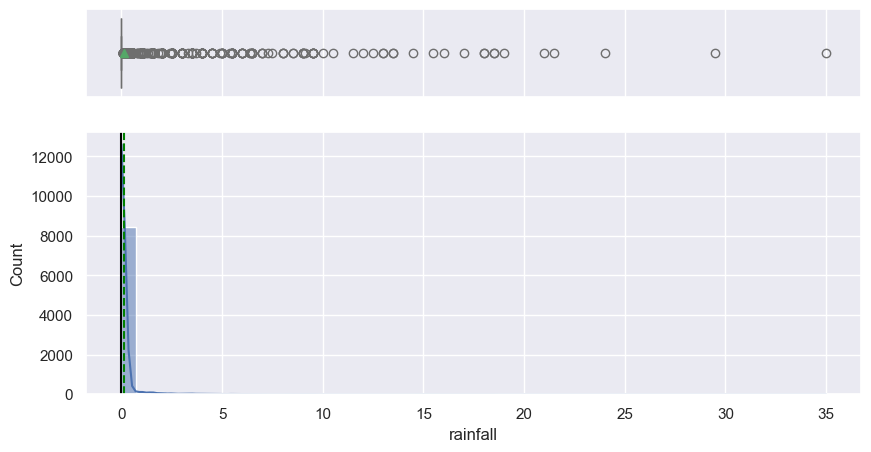

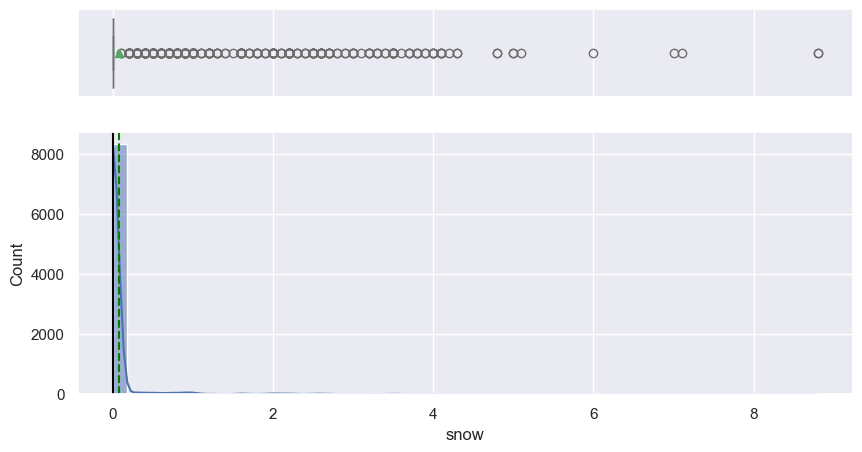

In [79]:
for f in features:
    histogram_boxplot(df, f)

There are outliers specially in the snowfall, rainfall and radiation column, so we remove the outliers by removing 5%ile data from the tails.

Correlation Matrix between the features.

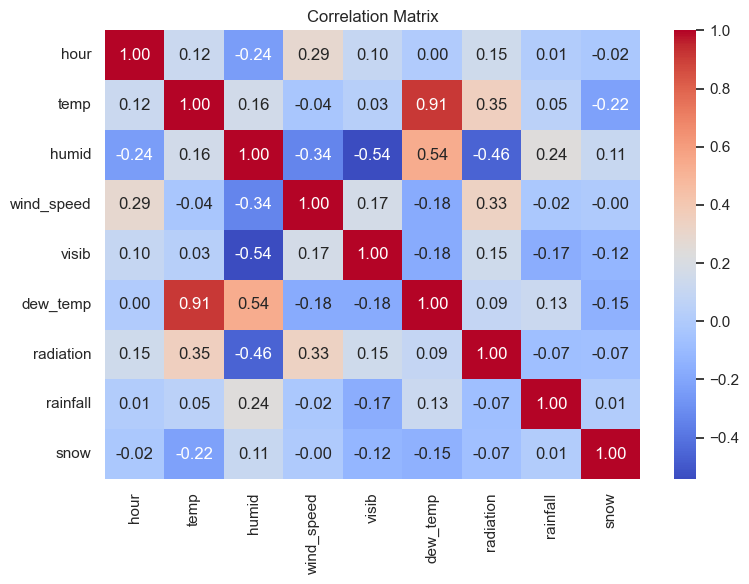

In [80]:
df_features = df[features]

# Plot correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df_features.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

Temperature and dew_temperature have high correlation thus it is better to remove the one with lower importance. Taking both doesn't affect the accuracy of the models because the coefficient will still remain unbiased, but variance of the coefficient will be large.

In [81]:
#Outliers removal and transformation
features = ['snow', 'rainfall', 'radiation', 'visib', 'humid']
for f in features:
    min = np.quantile(df[f], 0.03)
    max = np.quantile(df[f], 0.97)
    df = df[(df[f] >= min) & (df[f] <= max)]

/var/folders/b8/2d7gbg8x4f5_t6g67hccxsj40000gn/T/ipykernel_76609/3090232098.py:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
/var/folders/b8/2d7gbg8x4f5_t6g67hccxsj40000gn/T/ipykernel_76609/3090232098.py:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
/var/folders/b8/2d7gbg8x4f5_t6g67hccxsj40000gn/T/ipykernel_76609/3090232098.py:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
/var/folders/b8/2d7gbg8x4f5_t6g67hccxsj40000gn/T/ipykernel_76609/3090232098.py:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
/var/folders/b8/2d7gbg8x4f5_t6g67hccxsj40000gn/T/ipykernel_76609/3090232098.py:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


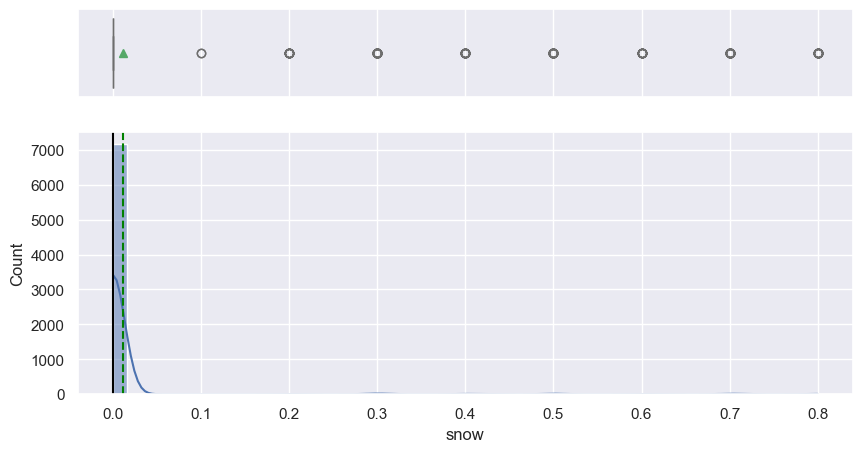

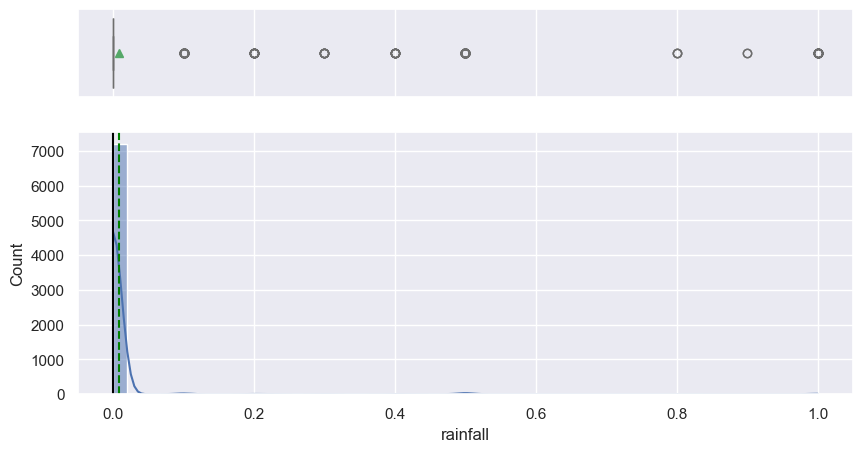

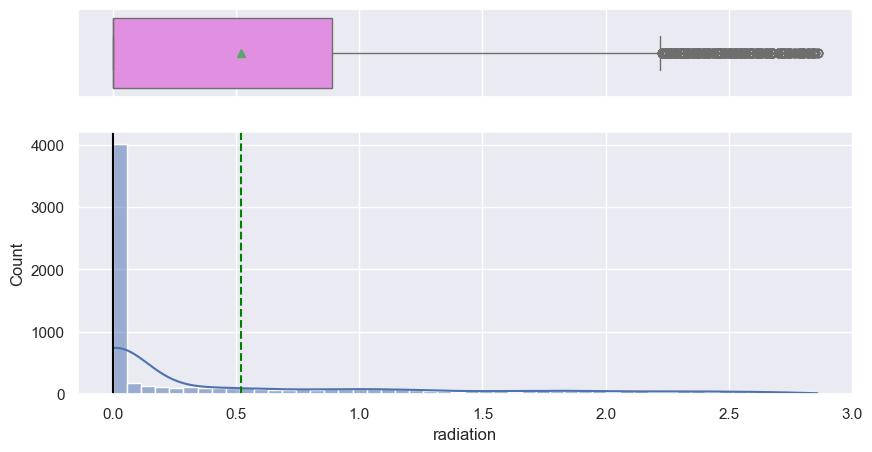

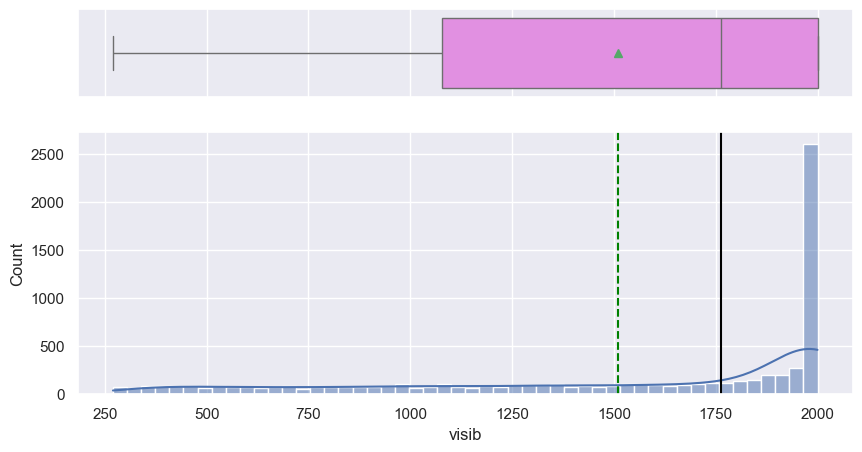

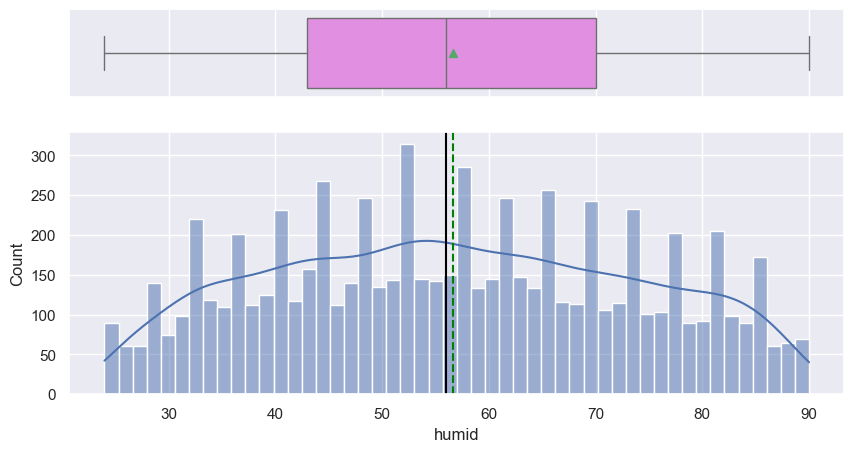

In [82]:
for f in features:
    histogram_boxplot(df,f)

## Dummy variables for the categorical data type

In [83]:
df

,date,rent_count,hour,temp,humid,wind_speed,visib,dew_temp,radiation,rainfall,snow,season,holiday,functioning_day,log_rent_count
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,5.869297
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,5.717028
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,5.609472
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,5.332719
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,5.181784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,7.005789
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,6.761573
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,6.677083
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,6.699500


In [84]:
# Create 4 dummy variables for all season categories
season_dummies = pd.get_dummies(df['season'], prefix='Season', drop_first=True)

# Concatenate them to the scaled DataFrame 
df = pd.concat([df, season_dummies], axis=1)

# Show the new columns
df.drop(columns='season', inplace=True)
print(df.head(5))

         date  rent_count  hour  temp  humid  wind_speed  visib  dew_temp  \
0  01/12/2017         254     0  -5.2     37         2.2   2000     -17.6   
1  01/12/2017         204     1  -5.5     38         0.8   2000     -17.6   
2  01/12/2017         173     2  -6.0     39         1.0   2000     -17.7   
3  01/12/2017         107     3  -6.2     40         0.9   2000     -17.6   
4  01/12/2017          78     4  -6.0     36         2.3   2000     -18.6   

   radiation  rainfall  snow     holiday functioning_day  log_rent_count  \
0        0.0       0.0   0.0  No Holiday             Yes        5.869297   
1        0.0       0.0   0.0  No Holiday             Yes        5.717028   
2        0.0       0.0   0.0  No Holiday             Yes        5.609472   
3        0.0       0.0   0.0  No Holiday             Yes        5.332719   
4        0.0       0.0   0.0  No Holiday             Yes        5.181784   

   Season_Spring  Season_Summer  Season_Winter  
0          False          False

In [85]:
# Create 4 dummy variables for all season categories
holiday_dummies = pd.get_dummies(df['holiday'], prefix='holiday', drop_first=True)

# Concatenate them back to the original DataFrame (optional)
df = pd.concat([df, holiday_dummies], axis=1)

# Show the new columns
df.drop(columns='holiday', inplace=True)
print(df.head(5))

         date  rent_count  hour  temp  humid  wind_speed  visib  dew_temp  \
0  01/12/2017         254     0  -5.2     37         2.2   2000     -17.6   
1  01/12/2017         204     1  -5.5     38         0.8   2000     -17.6   
2  01/12/2017         173     2  -6.0     39         1.0   2000     -17.7   
3  01/12/2017         107     3  -6.2     40         0.9   2000     -17.6   
4  01/12/2017          78     4  -6.0     36         2.3   2000     -18.6   

   radiation  rainfall  snow functioning_day  log_rent_count  Season_Spring  \
0        0.0       0.0   0.0             Yes        5.869297          False   
1        0.0       0.0   0.0             Yes        5.717028          False   
2        0.0       0.0   0.0             Yes        5.609472          False   
3        0.0       0.0   0.0             Yes        5.332719          False   
4        0.0       0.0   0.0             Yes        5.181784          False   

   Season_Summer  Season_Winter  holiday_No Holiday  
0       

We hot-encode the binary variables with True=1, False=0

In [86]:
functioning_day_dummies = pd.get_dummies(df['functioning_day'], prefix='functioning_day', drop_first=True)

df = pd.concat([df, functioning_day_dummies], axis=1)
df.drop(columns='functioning_day', inplace=True)

In [87]:
# Convert all boolean (True/False) columns to 0/1 integers
df = df.astype({col: int for col in df.columns if df[col].dtype == 'bool'})
columns_to_convert = ['Season_Spring', 'Season_Summer', 'Season_Winter', 
                      'holiday_No Holiday', 'functioning_day_Yes']
df[columns_to_convert] = df[columns_to_convert].astype(int)

In [88]:
df.head(5)

,date,rent_count,hour,temp,humid,wind_speed,visib,dew_temp,radiation,rainfall,snow,log_rent_count,Season_Spring,Season_Summer,Season_Winter,holiday_No Holiday,functioning_day_Yes
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,5.869297,0,0,1,1,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,5.717028,0,0,1,1,1
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,5.609472,0,0,1,1,1
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,5.332719,0,0,1,1,1
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,5.181784,0,0,1,1,1


In [89]:
df.count()

date                   7326
rent_count             7326
hour                   7326
temp                   7326
humid                  7326
wind_speed             7326
visib                  7326
dew_temp               7326
radiation              7326
rainfall               7326
snow                   7326
log_rent_count         7326
Season_Spring          7326
Season_Summer          7326
Season_Winter          7326
holiday_No Holiday     7326
functioning_day_Yes    7326
dtype: int64

## Feature selection

We use PCA,t-SNE and Random Forest for Dimentionality Reduction and get feature importance.

### PCA 

In [90]:
df

,date,rent_count,hour,temp,humid,wind_speed,visib,dew_temp,radiation,rainfall,snow,log_rent_count,Season_Spring,Season_Summer,Season_Winter,holiday_No Holiday,functioning_day_Yes
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,5.869297,0,0,1,1,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,5.717028,0,0,1,1,1
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,5.609472,0,0,1,1,1
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,5.332719,0,0,1,1,1
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,5.181784,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,7.005789,0,0,0,1,1
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,6.761573,0,0,0,1,1
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,6.677083,0,0,0,1,1
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,6.699500,0,0,0,1,1


In [91]:
df = df.dropna(how='any')
df

,date,rent_count,hour,temp,humid,wind_speed,visib,dew_temp,radiation,rainfall,snow,log_rent_count,Season_Spring,Season_Summer,Season_Winter,holiday_No Holiday,functioning_day_Yes
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,5.869297,0,0,1,1,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,5.717028,0,0,1,1,1
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,5.609472,0,0,1,1,1
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,5.332719,0,0,1,1,1
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,5.181784,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,7.005789,0,0,0,1,1
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,6.761573,0,0,0,1,1
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,6.677083,0,0,0,1,1
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,6.699500,0,0,0,1,1


In [92]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select only numeric features (drop date/time and categorical strings)
X = df.drop(columns=['date', 'rent_count', 'log_rent_count'])  # Drop non-numeric column
X = pd.get_dummies(X, drop_first=False)  # Just in case
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=5)  # Change to any number of components
X_pca = pca.fit_transform(X_scaled)

# Feature importance (PCA loadings)
loadings = pd.Series(
    abs(pca.components_[0]),
    index=X.columns
).sort_values(ascending=False)

print("Top PCA contributing features:\n", loadings.head(20))

Top PCA contributing features:
 dew_temp               0.529693
temp                   0.504468
Season_Winter          0.433296
Season_Summer          0.384348
humid                  0.270888
snow                   0.161331
radiation              0.097866
wind_speed             0.091393
visib                  0.068453
rainfall               0.058290
holiday_No Holiday     0.055283
functioning_day_Yes    0.030553
Season_Spring          0.005612
hour                   0.005011
dtype: float64


### TSNE

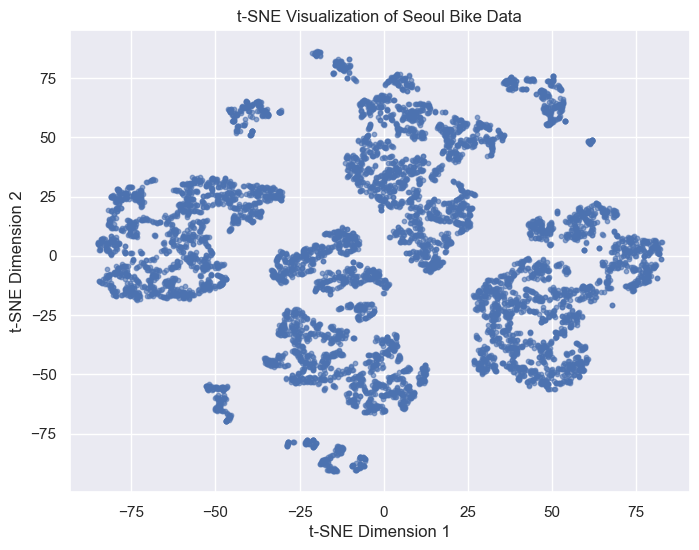

In [93]:
from sklearn.manifold import TSNE

# Drop non-numeric columns (e.g., 'date') and ensure all are numeric
X = df.drop(columns=['date', 'rent_count', 'log_rent_count'])  # drop 'date' or any non-numeric column
X = pd.get_dummies(X, drop_first=False)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], s=10, alpha=0.6)
plt.title("t-SNE Visualization of Seoul Bike Data")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.grid(True)
plt.show()

### Random Forest

In [94]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Features and target
X = df.drop(columns=['date', 'rent_count', 'log_rent_count'])  # Drop target and non-numeric/date columns
y = df['log_rent_count']

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [95]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

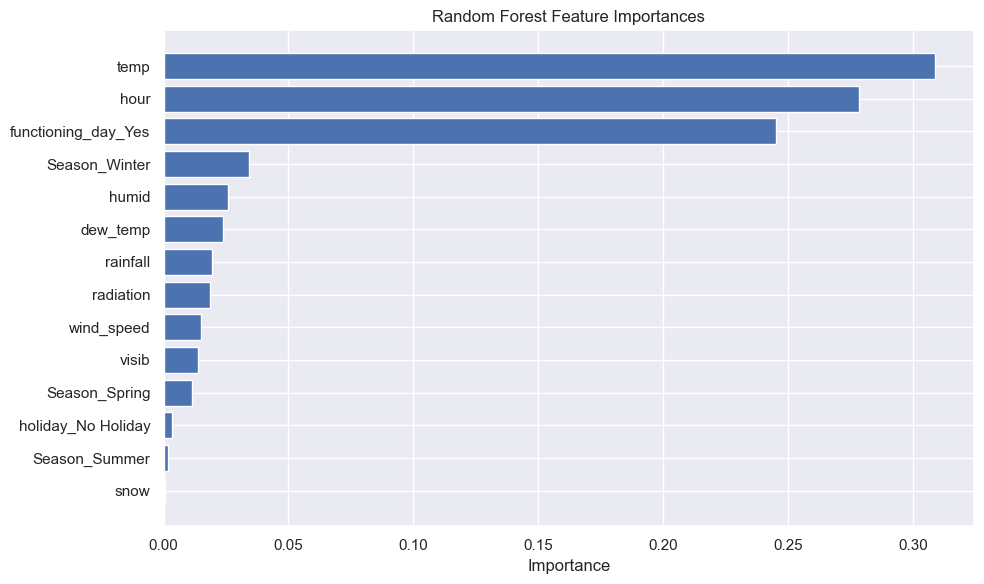

                Feature  Importance
1                  temp    0.309045
0                  hour    0.278327
13  functioning_day_Yes    0.245039
11        Season_Winter    0.034236
2                 humid    0.025720
5              dew_temp    0.023791
7              rainfall    0.019491
6             radiation    0.018531
3            wind_speed    0.014891
4                 visib    0.013926


In [96]:
# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Put into a DataFrame and sort
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()  # Most important at top
plt.title("Random Forest Feature Importances")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

# Print top 10 features
print(importance_df.head(10))

# 3. Methodology

## Multiple Linear Regression

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [98]:
print(df.head(5))
print(df.count())

         date  rent_count  hour  temp  humid  wind_speed  visib  dew_temp  \
0  01/12/2017         254     0  -5.2     37         2.2   2000     -17.6   
1  01/12/2017         204     1  -5.5     38         0.8   2000     -17.6   
2  01/12/2017         173     2  -6.0     39         1.0   2000     -17.7   
3  01/12/2017         107     3  -6.2     40         0.9   2000     -17.6   
4  01/12/2017          78     4  -6.0     36         2.3   2000     -18.6   

   radiation  rainfall  snow  log_rent_count  Season_Spring  Season_Summer  \
0        0.0       0.0   0.0        5.869297              0              0   
1        0.0       0.0   0.0        5.717028              0              0   
2        0.0       0.0   0.0        5.609472              0              0   
3        0.0       0.0   0.0        5.332719              0              0   
4        0.0       0.0   0.0        5.181784              0              0   

   Season_Winter  holiday_No Holiday  functioning_day_Yes  
0       

We take best 7 features from the random forest classification/dimentionality reduction and remove dew_temp as temp and dew_temp are highly correlated

In [99]:
features_selected = ['rainfall', 'hour','functioning_day_Yes', 'humid', 'Season_Winter', 'temp','radiation']
X = df[features_selected]
Y = df['log_rent_count']

In [100]:
#Data split
split_index = int(0.8 * len(df))
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

In [101]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred_test = linreg.predict(X_test)
y_pred_train = linreg.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)

In [102]:
print(f'''
{mse_test:.4f}= MSE from test data
{r2_test:.4f}= R^2 value from test data
{mse_train:.4f} = MSE from training data
{r2_train:.4f}= R^2 value from train data
''')


0.2491= MSE from test data
0.7156= R^2 value from test data
0.2148 = MSE from training data
0.6870= R^2 value from train data



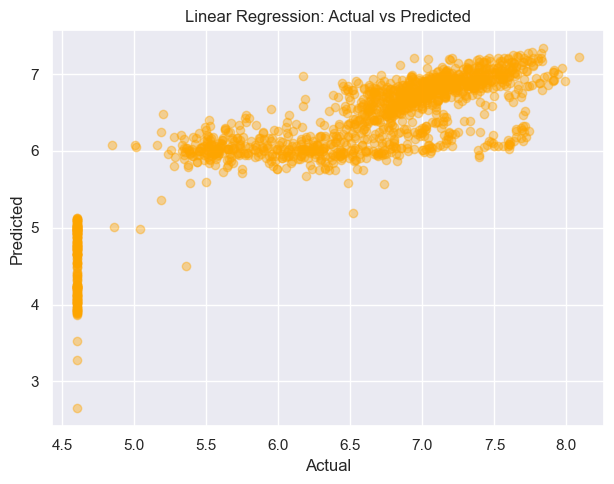

In [103]:
# Plot predicted vs actual
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_test, alpha=0.4, color = 'orange')
plt.title("Linear Regression: Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")

plt.tight_layout()
plt.show()

Residual on test data

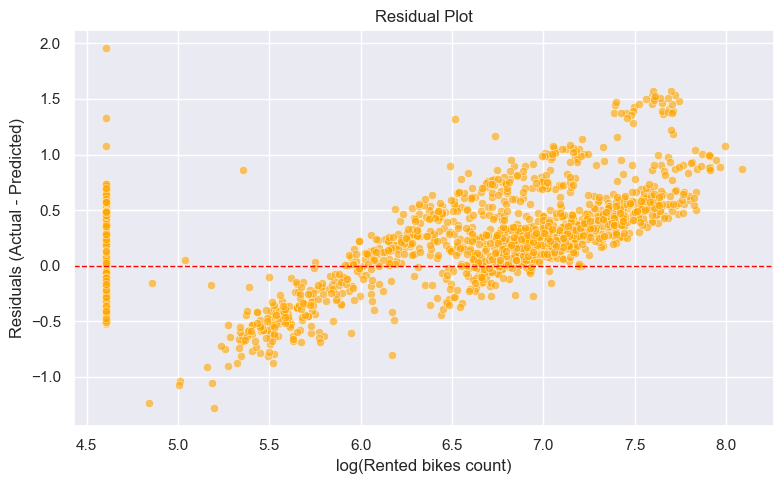

In [104]:
residuals = y_test - y_pred_test

# Create residual plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y, y=residuals, alpha=0.6, color ='orange')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.xlabel("log(Rented bikes count)")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.grid(True)
plt.tight_layout()
plt.show()

If we take all the features to fit the model, our R^2 will increase.

In [105]:
df

,date,rent_count,hour,temp,humid,wind_speed,visib,dew_temp,radiation,rainfall,snow,log_rent_count,Season_Spring,Season_Summer,Season_Winter,holiday_No Holiday,functioning_day_Yes
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,5.869297,0,0,1,1,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,5.717028,0,0,1,1,1
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,5.609472,0,0,1,1,1
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,5.332719,0,0,1,1,1
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,5.181784,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,7.005789,0,0,0,1,1
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,6.761573,0,0,0,1,1
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,6.677083,0,0,0,1,1
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,6.699500,0,0,0,1,1


In [106]:
X = df.drop(columns=['rent_count','log_rent_count', 'date'])
y = df['log_rent_count']

Stnadardising the covariates will help us interpret the coefficients better. Now the coefficients represent the change in the target variable(log_rent_count) per one standard deviation change in each feature. This doesn't change the RSS or MSE as the predictions don't change after standardisation.

In [107]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [111]:
#Data split
split_index = int(0.8 * len(df))
#X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
#y_train, y_test_lrg = y.iloc[:split_index], y.iloc[split_index:]

X_train, X_test_lrg = X[:split_index], X[split_index:]
y_train, y_test_lrg = y[:split_index], y[split_index:]

model_lrg = LinearRegression()
model_lrg.fit(X_train, y_train)
y_pred_test_lrg = model_lrg.predict(X_test)
y_pred_train = model_lrg.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test_lrg = mean_squared_error(y_test_lrg, y_pred_test_lrg)
r2_test_lrg = r2_score(y_test_lrg, y_pred_test_lrg)
r2_train = r2_score(y_train, y_pred_train)
print(f'''
{mse_test_lrg:.4f}= MSE from test data
{r2_test_lrg:.4f}= R^2 value from test data
{mse_train:.4f} = MSE from training data
{r2_train:.4f}= R^2 value from train data
''')


0.2249= MSE from test data
0.7432= R^2 value from test data
0.2104 = MSE from training data
0.6933= R^2 value from train data



## Gradient Boosting on tree based model

In [112]:
df

,date,rent_count,hour,temp,humid,wind_speed,visib,dew_temp,radiation,rainfall,snow,log_rent_count,Season_Spring,Season_Summer,Season_Winter,holiday_No Holiday,functioning_day_Yes
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,5.869297,0,0,1,1,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,5.717028,0,0,1,1,1
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,5.609472,0,0,1,1,1
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,5.332719,0,0,1,1,1
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,5.181784,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,7.005789,0,0,0,1,1
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,6.761573,0,0,0,1,1
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,6.677083,0,0,0,1,1
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,6.699500,0,0,0,1,1


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

X = df.drop(columns=['log_rent_count', 'date', 'rent_count'])
y = df['log_rent_count']

#chronological Split 
split_index = int(0.8 * len(df))
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test_xgb = y.iloc[:split_index], y.iloc[split_index:]

#X_train, X_test, y_train, y_test_xgb = train_test_split(X, y, test_size=0.2, random_state=69)

model_xgb = xgb.XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=2)
model_xgb.fit(X_train, y_train)

y_pred_xgb = model_xgb.predict(X_test)
MSE_xgb = mean_squared_error(y_test_xgb, y_pred_xgb)
print(f"MSE: {MSE_xgb:.4f}")
r2_xgb = r2_score(y_test_xgb, y_pred_xgb)
print(f"R^2 Score: {r2_xgb:.4f}")

MSE: 0.1615
R^2 Score: 0.8156


# 4. Comparison

In [114]:
print("Linear Regression R²:", r2_test_lrg)
print("XGBoost R²:", r2_xgb)

Linear Regression R²: 0.7432248665587102
XGBoost R²: 0.8156200423111284


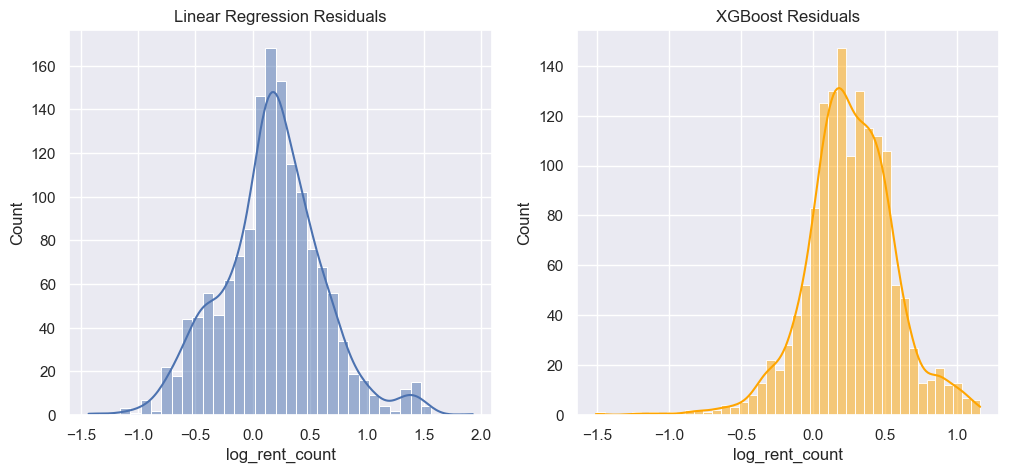

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

# Residuals
residuals_lr = y_test_lrg - y_pred_test_lrg
residuals_xgb = y_test - y_pred_xgb

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(residuals_lr, kde=True)
plt.title('Linear Regression Residuals')

plt.subplot(1, 2, 2)
sns.histplot(residuals_xgb, kde=True, color='orange')
plt.title('XGBoost Residuals')

plt.show()

## Interpretation

In [116]:
print(model_lrg.coef_)  # Coefficients

[ 0.26590189  0.03528671 -0.24799192  0.01571649 -0.01500632  0.43391049
 -0.0079172  -0.0986007   0.0083685  -0.03154735 -0.06468098 -0.19027528
  0.05098038  0.4053902 ]


In [117]:
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model_lrg.coef_
})
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

print(coef_df[['Feature', 'Coefficient']])

                Feature  Coefficient
5              dew_temp     0.433910
13  functioning_day_Yes     0.405390
0                  hour     0.265902
2                 humid    -0.247992
11        Season_Winter    -0.190275
7              rainfall    -0.098601
10        Season_Summer    -0.064681
12   holiday_No Holiday     0.050980
1                  temp     0.035287
9         Season_Spring    -0.031547
3            wind_speed     0.015716
4                 visib    -0.015006
8                  snow     0.008368
6             radiation    -0.007917


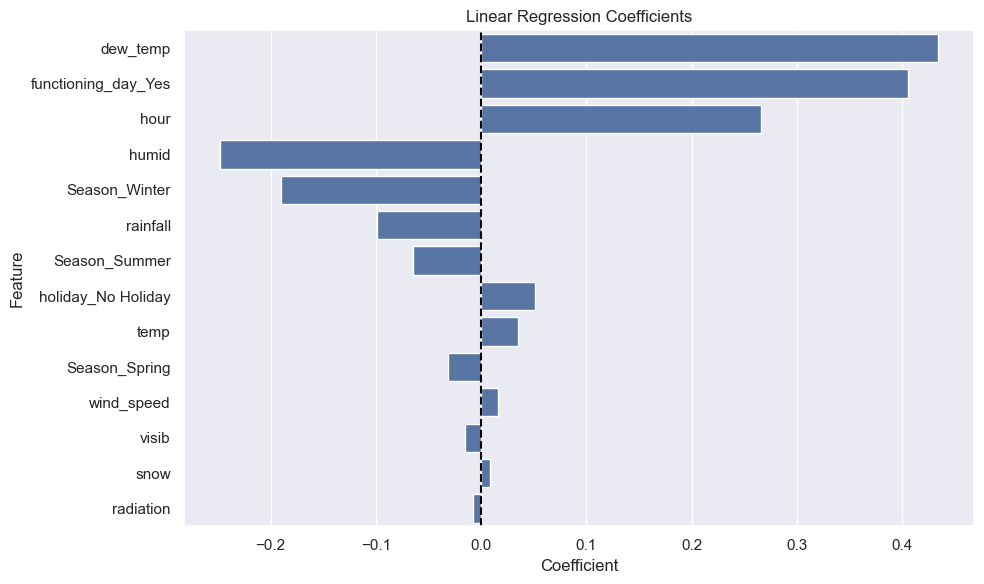

In [125]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title('Linear Regression Coefficients')
plt.axvline(0, color='black', linestyle='--')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

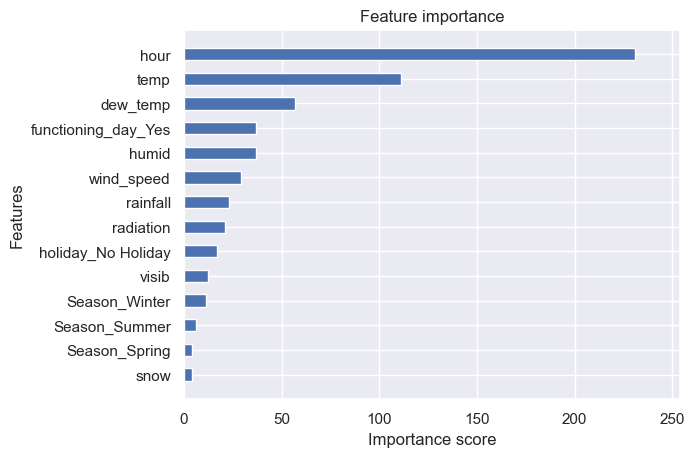

In [123]:
plt.figure(figsize=(10, 6))  # Set the figure size here
xgb.plot_importance(model_xgb, height=0.5, importance_type='weight', show_values=False)
plt.show()